#### Learning rate: Effect on gradient descent updates in linear regression

*Author: Rabindra Nepal*

Email: rnepal2@unl.edu

Here, we will look into the effect of learning rate in the gradient descent update in linear regression models. The learning updates in the weights, corresponding linear lines for a single feature simple model, are plotting for different values of the learning rate where we can observe the progress of the training model in every steps during the training process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plots the updated regression lines and returns intercept and weight

def weight_update(X, y, learning_rate=0.001, epochs=100, plot_each=10):
    # plotting training data
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, c='g')
    
    X = np.c_[np.ones((X.shape[0], 1)), X]
    n_samples, n_features = X.shape[0], X.shape[1]
    theta = np.random.rand(n_features, 1)
    
    # preparing test data
    x_test = np.arange(0.1, 5.1, 0.22)
    X_test = x_test.reshape(len(x_test), 1)
    
    # weight update: gradient descent
    for epoch in range(epochs):
        # gradient descent update in weight
        theta = theta - 2*(learning_rate/n_samples) * np.dot(X.T, np.dot(X, theta) - y)
        
        y_test = theta[0] + np.dot(X_test, theta[1: ].T)
        # adding lines
        if epoch % plot_each == 0:
            # first line
            if epoch == 0:
                plt.plot(X_test, y_test, label=epoch, ls='--', c='b')
                continue
            plt.plot(X_test, y_test, label=epoch)
            plt.legend(loc=(1.05, 0))
    
    plt.title('Gradient descent update (learning_rate: %.3f)' % learning_rate)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.show()
    
    # intercept and weight
    intercept, weight = theta[0], theta[1: ]
    return intercept, weight

In [3]:
# preparing training data
x = np.arange(0, 5, 0.1)
y = 5 + 2*x + 3*(1 - 2*np.random.rand(50, ))

# reshaping
X = x.reshape(50, 1)
y = y.reshape(50, 1)

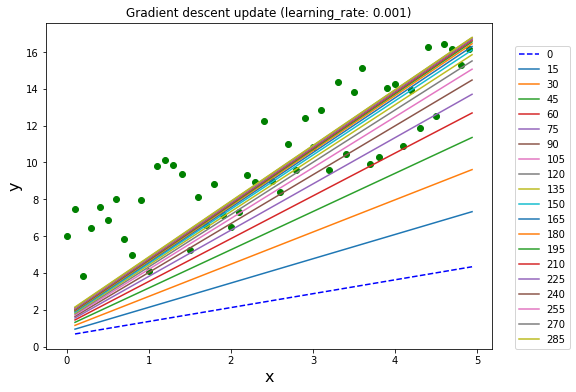

In [4]:
# very small learning rate
weight_update(X, y, learning_rate=0.001, epochs=300, plot_each=15);

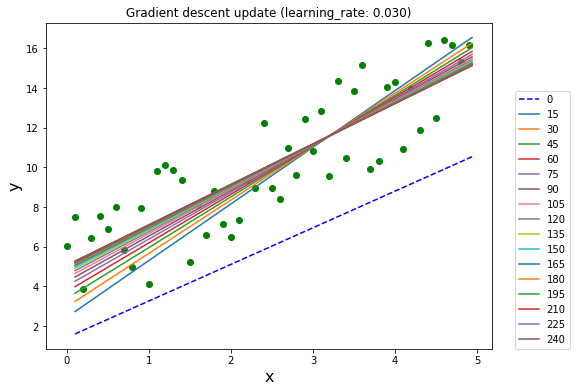

In [5]:
# moderate learning rate
weight_update(X, y, learning_rate=0.03, epochs=250, plot_each=15);

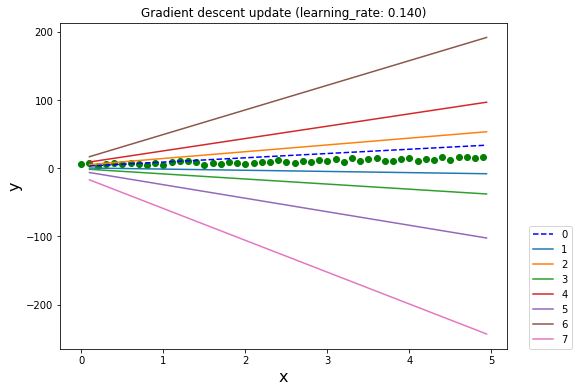

In [6]:
# very large learning rate
weight_update(X, y, learning_rate=0.14, epochs=8, plot_each=1);

Notice that the weight or prediction values diverges very quickly for very large learning_rate.

### Observations and conclusions:

The learning rate plays a very important role as it multiplies the gradient vector to determine the size of the downhill step during the gradient descent updates.

(See the first figure above): When the learning rate is too low, the algorithm will eventually reach the solution, but it will take a long time. 

(See the second figure above): When the learning rate looks pretty good, it converges to the solution in few iterations.

(See the third figure above): When the learning rate is larger than certain threshold, the algorithm diverges jumping all over the place and actually getting further and further away from the solution at every step.

### Animation

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
rc('animation', html='html5')

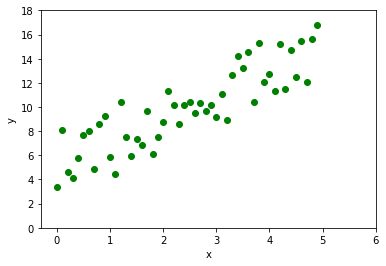

In [8]:
# preparing training data
np.random.seed(seed=10)
x = np.arange(0, 5, 0.1)
y = 5 + 2*x + 3*(1 - 2*np.random.rand(50, ))
# reshaping
X = x.reshape(50, 1)
y = y.reshape(50, 1)

# plotting
fig, ax = plt.subplots()

ax.set_xlim(( -0.3, 6))
ax.set_ylim((0, 18))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(X, y, c='g')
line, = ax.plot([], [], lw=2, c='r')

In [9]:
# initiatiation function
def init():
    line.set_data([], [])
    return (line,)

# animation - updates the fitting line
def animate(epochs):
    learning_rate=0.015
    
    # preparing training data
    np.random.seed(seed=10)
    x = np.arange(0, 5, 0.1)
    y = 5 + 2*x + 3*(1 - 2*np.random.rand(50, ))
    # reshaping
    X = x.reshape(50, 1)
    y = y.reshape(50, 1)
    
    # adding intercept axis
    X = np.c_[np.ones((X.shape[0], 1)), X]
    n_samples, n_features = X.shape[0], X.shape[1]
    theta = np.random.rand(n_features, 1)
    
    # weight update: gradient descent
    for epoch in range(epochs):
        theta = theta - 2*(learning_rate/n_samples) * np.dot(X.T, np.dot(X, theta) - y)
    
    # predictions
    y_pred = np.dot(X, theta)
    X_t = X[:, 1].reshape(len(X), 1)
    line.set_data(X_t, y_pred)
    
    return (line, )

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=25, blit=True, repeat=True, repeat_delay=20)

anim.save('animation.gif', writer='pillow', fps=60)

In [11]:
Image(url='./animation.gif')

Please reload the page to restart the .gif again.

***Done!***